In [1]:
# set the working directory to be the root of the package
# so that the imports work below
import sys
sys.path.append("..")

In [2]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
from xgboost import plot_tree, plot_importance
import models.xgb as xgb
import models.data_util

In [3]:
data_file = "../data/clean.pkl"  # set this accordingly
model_file = "../data/xgb_model.bin"
predictor_names = list(pd.read_pickle(data_file).drop('isfailed', axis=1).columns)

In [4]:
# Use helper function to convert everything to numpy etc:
x, y_true = models.data_util.load_raw_data(data_file)

In [5]:
# load model
model = xgb.from_file(model_file)

In [6]:
# predict probabilities of positive class:
y_pred = model.predict_proba(x).T[1].T
print(y_pred)

[0.1933475  0.1933475  0.1933475  ... 0.43191925 0.43191925 0.48368952]


In [7]:
# get ROC graph
fpr, tpr, thresholds = skl.metrics.roc_curve(y_true, y_pred)

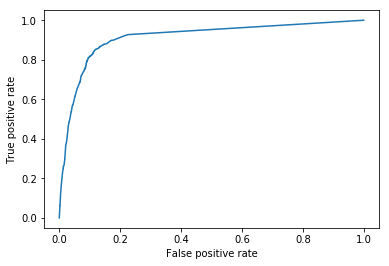

In [8]:
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [9]:
print("Area =", skl.metrics.auc(fpr, tpr))

Area = 0.9122297240802676


In [10]:
# set the feature names to make the model visualisations more interpretable;
# (this is unfortunately not done automatically by XGBoost's model
# loading/saving functionality, which is rather annoying)
model.get_booster().feature_names = predictor_names

Now let's visualise the resulting tree:


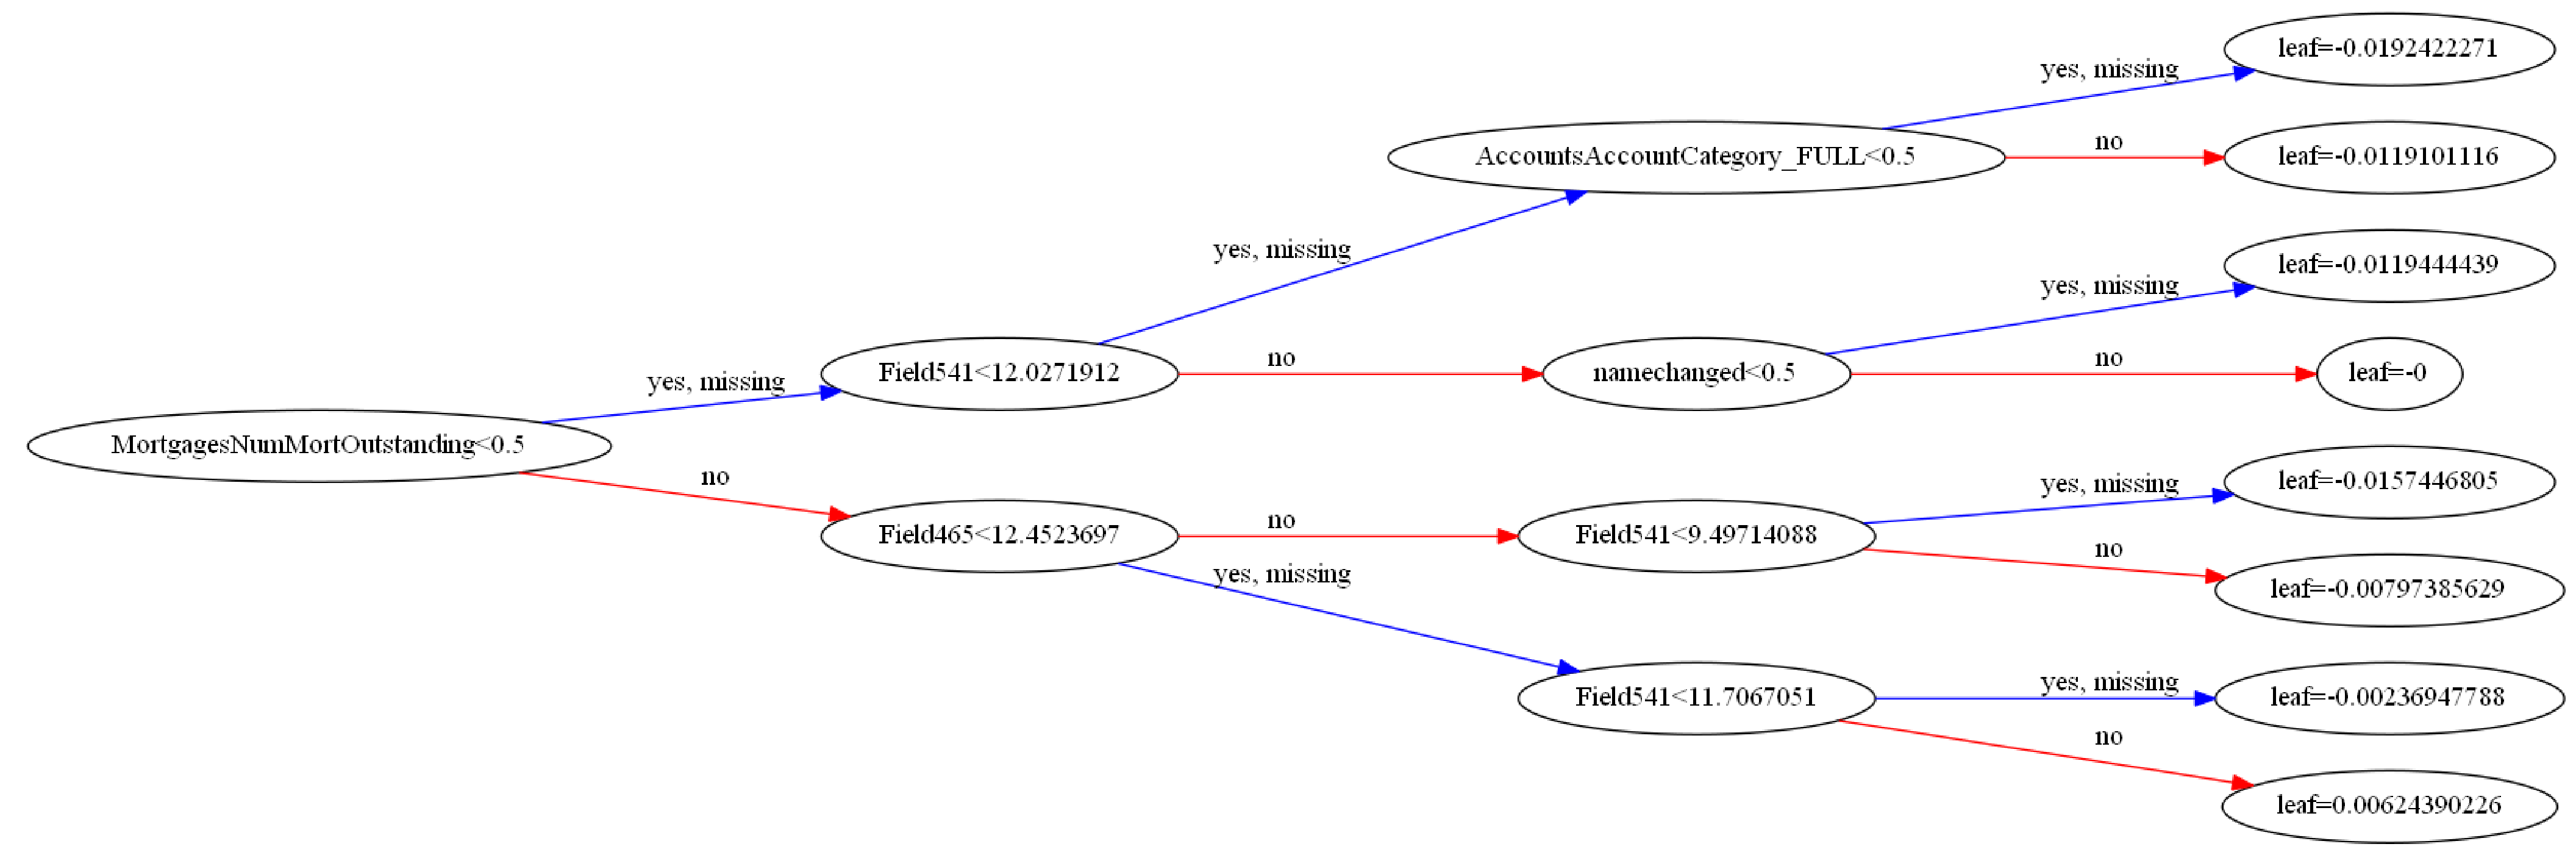

In [11]:
print("Now let's visualise the resulting tree:")
fig, ax = plt.subplots(figsize=(75, 75))
plot_tree(model, rankdir='LR', ax=ax)
plt.show()

Let's visualise the importance of each feature!
Firstly, look at feature weight (the number of times a feature is used to split the data, across all trees):


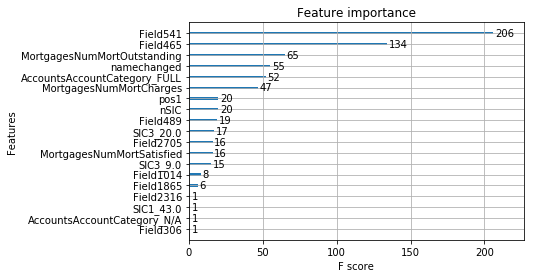

Secondly, look at feature cover (the number of times a feature is used to split the data, across all trees, but weighted by the number of training points that gothrough the split):


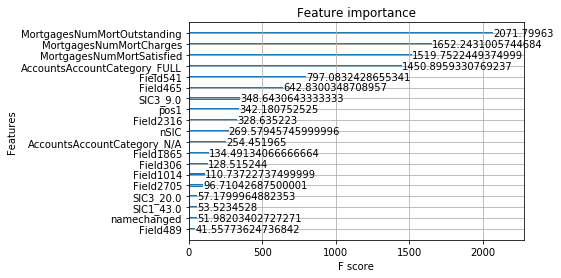

Finally, look at feature gain (the average training data loss reduction obtained when using a feature for splitting):


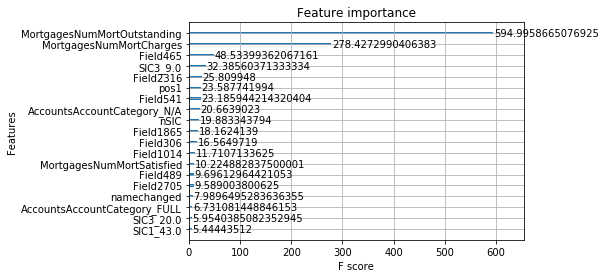

In [14]:
print("Let's visualise the importance of each feature!")

print("Firstly, look at feature weight (the number of times"
      " a feature is used to split the data, across all trees):")
plot_importance(model, importance_type='weight')
plt.show()

print("Secondly, look at feature cover (the number of times a "
      "feature is used to split the data, across all trees, "
      "but weighted by the number of training points that go"
      "through the split):")
plot_importance(model, importance_type='cover')
plt.show()

print("Finally, look at feature gain (the average training data "
      "loss reduction obtained when using a feature for splitting):")
plot_importance(model, importance_type='gain')
plt.show()